In [1]:
import matplotlib.pyplot as plt

'positive': 2, 'negative': 5, 'neutral': 11
{'positive': 2, 'negative': 5, 'neutral': 11}


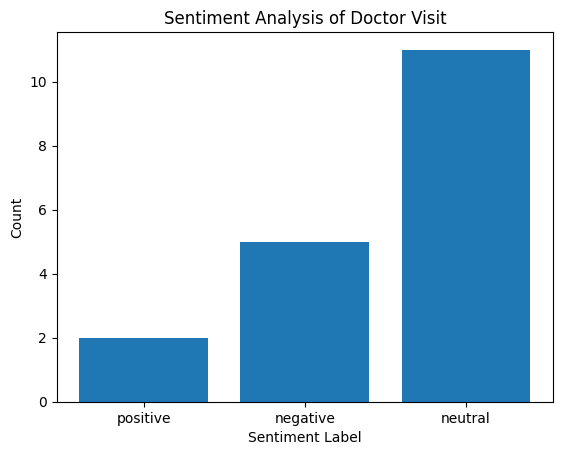

In [14]:
with open('SpeechAnalysis\sentiment-doc-pat.txt', 'r') as f:
    lines = f.readlines()
data = lines[-1].split("FINAL COUNTS: ")[1][1:-1]
print(data)
data = data.replace("'", "")
data = data.split(", ")
data = {x.split(": ")[0]: int(x.split(": ")[1]) for x in data}
print(data)
labels = list(data.keys())
counts = list(data.values())

plt.bar(range(len(data)), counts, tick_label=labels)
plt.title("Sentiment Analysis of Doctor Visit")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()
